In [ ]:
import os
import re
import sys

import skimage.io as skio
import matplotlib.pyplot as plt

import numpy as np
import os
import sys
from math import sqrt

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split
from scipy.special import expit, logit
from skimage.transform import rescale, resize, downscale_local_mean

import time

from PIL import Image
from skimage.feature import hog

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def ReadImageFolder(path):
    filepaths = [os.path.join(r,file) for r,d,f in os.walk(path) for file in f]
    ext = [".tif",".TIF"]
    filepaths = [x for x in filepaths if x.endswith(tuple(ext))]
    return filepaths


In [ ]:
Labels = [ ]

path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin"
actin_paths = ReadImageFolder(path)
for i in range(len(actin_paths)):
  Labels.append(0)

path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/dna"
dna_paths = ReadImageFolder(path)
for i in range(len(dna_paths)):
  Labels.append(1)

path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/endosome"
endosome_paths = ReadImageFolder(path)
for i in range(len(endosome_paths)):
  Labels.append(2)

path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/er"
er_paths = ReadImageFolder(path)
for i in range(len(er_paths)):
  Labels.append(3)

path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/golgia"
golgia_paths = ReadImageFolder(path)
for i in range(len(golgia_paths)):
  Labels.append(4)

path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/golgpp"
golgpp_paths = ReadImageFolder(path)
for i in range(len(golgpp_paths)):
  Labels.append(5)

path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/lysosome"
lysosome_paths = ReadImageFolder(path)
for i in range(len(lysosome_paths)):
  Labels.append(6)


path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/microtubules"
microtubules_paths = ReadImageFolder(path)
for i in range(len(microtubules_paths)):
  Labels.append(7)

path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/mitochondria"
mitochondria_paths = ReadImageFolder(path)
for i in range(len(mitochondria_paths)):
  Labels.append(8)

path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/nucleolus"
nucleolus_paths = ReadImageFolder(path)
for i in range(len(nucleolus_paths)):
  Labels.append(9)


Paths_Array = [actin_paths , dna_paths , endosome_paths , er_paths , golgia_paths , golgpp_paths , lysosome_paths , microtubules_paths , mitochondria_paths , nucleolus_paths]
print(Paths_Array[0])


['/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_001.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_002.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_072.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_067.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_070.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_009.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_007.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_068.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_011.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_004.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_069.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_010.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_071.tif', '/content/d

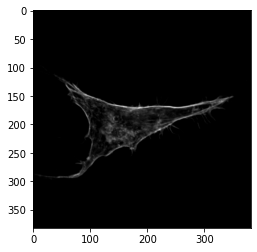

In [ ]:
img = skio.imread(actin_paths[0])
plt.imshow(img,cmap='gray')
plt.show()


In [ ]:

def PrepareImagesArray(paths,AllImages_Array):

    for i in paths:

      img = Image.open(i)
      img = img.convert('L')
      resized_Length = 36
      resized_Height = 36
      newsize = (resized_Length , resized_Height)
      out = img.resize(newsize, Image.LANCZOS)
      image = np.array(out)
      image = image.astype("float64")
      image = (image - image.mean()) / (image.std()) # New Normalize

      AllImages_Array.append(image)



In [ ]:
AllImages_Array = [ ]
print(Paths_Array[0])
for i in Paths_Array:
  PrepareImagesArray(i,AllImages_Array)

AllImages_Array_np = np.array(AllImages_Array)


['/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_001.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_002.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_072.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_067.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_070.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_009.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_007.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_068.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_011.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_004.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_069.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_010.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_071.tif', '/content/d

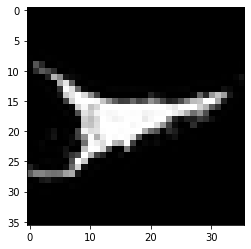

In [ ]:
plt.imshow(AllImages_Array_np[0],cmap='gray')
plt.show()

In [ ]:

class Conv3x3:
  # A Convolution layer using 3x3 filters.

  def __init__(self, num_filters):
    self.num_filters = num_filters

    # filters is a 3d array with dimensions (num_filters, 3, 3)
    # We divide by 9 to reduce the variance of our initial values
    self.filters = np.random.randn(num_filters, 3, 3) / 9

  def iterate_regions(self, image):
    '''
    Generates all possible 3x3 image regions using valid padding.
    - image is a 2d numpy array.
    '''
    h, w = image.shape

    for i in range(h - 2):
      for j in range(w - 2):
        im_region = image[i:(i + 3), j:(j + 3)]
        yield im_region, i, j

  def forward(self, input):
    '''
    Performs a forward pass of the conv layer using the given input.
    Returns a 3d numpy array with dimensions (h, w, num_filters).
    - input is a 2d numpy array
    '''
    self.last_input = input

    h, w = input.shape
    output = np.zeros((h - 2, w - 2, self.num_filters))

    for im_region, i, j in self.iterate_regions(input):
      output[i, j] = np.sum(im_region * self.filters, axis=(1, 2))

    return output

  def backprop(self, d_L_d_out, learn_rate):
    '''
    Performs a backward pass of the conv layer.
    - d_L_d_out is the loss gradient for this layer's outputs.
    - learn_rate is a float.
    '''
    d_L_d_filters = np.zeros(self.filters.shape)

    for im_region, i, j in self.iterate_regions(self.last_input):
      for f in range(self.num_filters):
        d_L_d_filters[f] += d_L_d_out[i, j, f] * im_region

    # Update filters
    self.filters -= learn_rate * d_L_d_filters

    # We aren't returning anything here since we use Conv3x3 as the first layer in our CNN.
    # Otherwise, we'd need to return the loss gradient for this layer's inputs, just like every
    # other layer in our CNN.
    return d_L_d_out

In [ ]:
class MaxPool2:
  # A Max Pooling layer using a pool size of 2.

  def iterate_regions(self, image):
    '''
    Generates non-overlapping 2x2 image regions to pool over.
    - image is a 2d numpy array
    '''
    h, w, _ = image.shape
    new_h = h // 2
    new_w = w // 2

    for i in range(new_h):
      for j in range(new_w):
        im_region = image[(i * 2):(i * 2 + 2), (j * 2):(j * 2 + 2)]
        yield im_region, i, j

  def forward(self, input):
    '''
    Performs a forward pass of the maxpool layer using the given input.
    Returns a 3d numpy array with dimensions (h / 2, w / 2, num_filters).
    - input is a 3d numpy array with dimensions (h, w, num_filters)
    '''
    self.last_input = input

    h, w, num_filters = input.shape
    output = np.zeros((h // 2, w // 2, num_filters))

    for im_region, i, j in self.iterate_regions(input):
      output[i, j] = np.amax(im_region, axis=(0, 1))

    return output

  def backprop(self, d_L_d_out):
    '''
    Performs a backward pass of the maxpool layer.
    Returns the loss gradient for this layer's inputs.
    - d_L_d_out is the loss gradient for this layer's outputs.
    '''
    d_L_d_input = np.zeros(self.last_input.shape)

    for im_region, i, j in self.iterate_regions(self.last_input):
      h, w, f = im_region.shape
      amax = np.amax(im_region, axis=(0, 1))

      for i2 in range(h):
        for j2 in range(w):
          for f2 in range(f):
            # If this pixel was the max value, copy the gradient to it.
            if im_region[i2, j2, f2] == amax[f2]:
              d_L_d_input[i * 2 + i2, j * 2 + j2, f2] = d_L_d_out[i, j, f2]

    return d_L_d_input

In [ ]:
class Softmax:
  # A standard fully-connected layer with softmax activation.

  def __init__(self, input_len, nodes):
    # We divide by input_len to reduce the variance of our initial values
    self.weights = np.random.randn(input_len, nodes) / input_len
    self.biases = np.zeros(nodes)

  def forward(self, input):
    '''
    Performs a forward pass of the softmax layer using the given input.
    Returns a 1d numpy array containing the respective probability values.
    - input can be any array with any dimensions.
    '''
    self.last_input_shape = input.shape

    input = input.flatten()
    self.last_input = input

    input_len, nodes = self.weights.shape

    totals = np.dot(input, self.weights) + self.biases
    self.last_totals = totals

    exp = np.exp(totals)
    return exp / np.sum(exp, axis=0)

  def backprop(self, d_L_d_out, learn_rate):
    '''
    Performs a backward pass of the softmax layer.
    Returns the loss gradient for this layer's inputs.
    - d_L_d_out is the loss gradient for this layer's outputs.
    - learn_rate is a float.
    '''
    # We know only 1 element of d_L_d_out will be nonzero
    for i, gradient in enumerate(d_L_d_out):
      if gradient == 0:
        continue

      # e^totals
      t_exp = np.exp(self.last_totals)

      # Sum of all e^totals
      S = np.sum(t_exp)

      # Gradients of out[i] against totals
      d_out_d_t = -t_exp[i] * t_exp / (S ** 2)
      d_out_d_t[i] = t_exp[i] * (S - t_exp[i]) / (S ** 2)

      # Gradients of totals against weights/biases/input
      d_t_d_w = self.last_input
      d_t_d_b = 1
      d_t_d_inputs = self.weights

      # Gradients of loss against totals
      d_L_d_t = gradient * d_out_d_t

      # Gradients of loss against weights/biases/input
      d_L_d_w = d_t_d_w[np.newaxis].T @ d_L_d_t[np.newaxis]
      d_L_d_b = d_L_d_t * d_t_d_b
      d_L_d_inputs = d_t_d_inputs @ d_L_d_t

      # Update weights / biases
      self.weights -= learn_rate * d_L_d_w
      self.biases -= learn_rate * d_L_d_b

      return d_L_d_inputs.reshape(self.last_input_shape)

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(AllImages_Array , Labels, test_size=0.15)
x_train , x_valid , y_train , y_valid = train_test_split(x_train , y_train, test_size=0.18)

In [ ]:


train_images = x_train
train_labels = y_train
test_images = x_test
test_labels = y_test

conv = Conv3x3(32)                  
pool = MaxPool2()                  
softmax = Softmax(17 * 17 * 32, 10) 

def forward(image, label):
  '''
  Completes a forward pass of the CNN and calculates the accuracy and
  cross-entropy loss.
  - image is a 2d numpy array
  - label is a digit
  '''
  # We transform the image from [0, 255] to [-0.5, 0.5] to make it easier
  # to work with. This is standard practice.
  out = conv.forward((image))
  out = pool.forward(out)
  out = softmax.forward(out)

  # Calculate cross-entropy loss and accuracy. np.log() is the natural log.
  loss = -np.log(out[label])
  acc = 1 if np.argmax(out) == label else 0

  return out, loss, acc

def train(im, label, lr=0.01):
  '''
  Completes a full training step on the given image and label.
  Returns the cross-entropy loss and accuracy.
  - image is a 2d numpy array
  - label is a digit
  - lr is the learning rate
  '''
  # Forward
  out, loss, acc = forward(im, label)

  # Calculate initial gradient
  gradient = np.zeros(10)
  gradient[label] = -1 / out[label]

  # Backprop
  gradient = softmax.backprop(gradient, lr)
  gradient = pool.backprop(gradient)
  gradient = conv.backprop(gradient, lr)

  return loss, acc

start = time.time()
# Train the CNN for 3 epochs
for epoch in range(9):
  print('--- Epoch %d ---' % (epoch + 1))

  # Shuffle the training data
  permutation = np.random.permutation(len(train_images))
  train_images = np.array(train_images)
  train_labels = np.array(train_labels)
  train_images = train_images[permutation]
  train_labels = train_labels[permutation]

  # Train!
  loss = 0
  num_correct = 0

  loss_valid = 0
  num_correct_valid = 0
  for i, (im, label) in enumerate(zip(train_images, train_labels)):
    if i % 100 == 99:
      end = time.time()
      print(
        '[Step %d] Past 100 steps: Average Loss %.3f | Accuracy: %d%% | Elapsed time in minutes: %.3f ' %
        (i + 1, loss / 100, num_correct, (end-start)/60)
      )

      loss = 0
      num_correct = 0

    l, acc = train(im, label)
    loss += l
    num_correct += acc
    
    if i % 100 == 99:
      for im_valid, label_valid in zip(x_valid, y_valid):
        _, l_valid, acc_valid = forward(im_valid, label_valid)
        loss_valid += l_valid
        num_correct_valid += acc_valid

      end = time.time()
      print(
        '[Step %d] Past 100 steps: Average Loss Valid %.3f | Accuracy Valid: %d%% | Elapsed time in minutes: %.3f ' %
        (i + 1, loss_valid / 100, num_correct_valid, (end-start)/60)
      )
      loss_valid = 0
      num_correct_valid = 0
# Test the CNN
print('\n--- Testing the CNN ---')
loss = 0
num_correct = 0
for im, label in zip(test_images, test_labels):
  _, l, acc = forward(im, label)
  loss += l
  num_correct += acc

num_tests = len(test_images)
print('Test Loss:', loss / num_tests)
print('Test Accuracy:', num_correct / num_tests)

--- Epoch 1 ---
[Step 100] Past 100 steps: Average Loss 2.218 | Accuracy: 16% | Elapsed time in minutes: 0.278 
[Step 100] Past 100 steps: Average Loss Valid 2.266 | Accuracy Valid: 33% | Elapsed time in minutes: 0.316 
[Step 200] Past 100 steps: Average Loss 2.193 | Accuracy: 22% | Elapsed time in minutes: 0.596 
[Step 200] Past 100 steps: Average Loss Valid 2.373 | Accuracy Valid: 26% | Elapsed time in minutes: 0.633 
[Step 300] Past 100 steps: Average Loss 2.117 | Accuracy: 23% | Elapsed time in minutes: 0.913 
[Step 300] Past 100 steps: Average Loss Valid 2.006 | Accuracy Valid: 44% | Elapsed time in minutes: 0.951 
[Step 400] Past 100 steps: Average Loss 2.081 | Accuracy: 26% | Elapsed time in minutes: 1.228 
[Step 400] Past 100 steps: Average Loss Valid 2.121 | Accuracy Valid: 33% | Elapsed time in minutes: 1.265 
[Step 500] Past 100 steps: Average Loss 2.037 | Accuracy: 25% | Elapsed time in minutes: 1.542 
[Step 500] Past 100 steps: Average Loss Valid 2.222 | Accuracy Valid: 24